# Generator-Funktion für Reihenfolge

## Harmonische Folge

In [2]:
def generator(gen, n):
    count = 1
    results = list()
    for i in gen:
        if count > n:
            return results
        count += 1
        results.append(i)

Reihenfolge: $1, \frac{1}{2}, \frac{1}{3}, \frac{1}{4}, \frac{1}{5}, \frac{1}{6}, \frac{1}{7}, ...$

In [3]:
from fractions import Fraction

def harmonic():
    n = 1
    while True:
        yield Fraction(1, n)
        n += 1

In [4]:
generator(harmonic(), 7)

[Fraction(1, 1),
 Fraction(1, 2),
 Fraction(1, 3),
 Fraction(1, 4),
 Fraction(1, 5),
 Fraction(1, 6),
 Fraction(1, 7)]

### Weitere Reihenfolge
Reihenfolge i: $1,3,9,27,81,243,729,...$ = $n^3$     
Reihenfolge ii: $1,-\frac{1}{2},\frac{1}{4},-\frac{1}{8},\frac{1}{16},...$ = $\frac{1}{(-2)^n}$    
Reihenfolge iii: $1,3,6,10,15,21,28,36,45,55,..$ = $\frac{n*(n-1)}{2}$ Gausssche Summenformel

In [5]:
def r_i():
    n = 0
    while True:
        yield n**3
        n += 1
        
generator(r_i(), 10)

[0, 1, 8, 27, 64, 125, 216, 343, 512, 729]

In [6]:
def r_ii():
    n = 0
    while True:
        yield Fraction(1, (-2)**n)
        n += 1
        
generator(r_ii(), 10)

[Fraction(1, 1),
 Fraction(-1, 2),
 Fraction(1, 4),
 Fraction(-1, 8),
 Fraction(1, 16),
 Fraction(-1, 32),
 Fraction(1, 64),
 Fraction(-1, 128),
 Fraction(1, 256),
 Fraction(-1, 512)]

In [7]:
def r_iii():
    n = 1
    while True:
        yield (n * (n + 1)) / 2
        n += 1

generator(r_iii(), 10)

[1.0, 3.0, 6.0, 10.0, 15.0, 21.0, 28.0, 36.0, 45.0, 55.0]

## Grenzwerte
Beweis warum $(\frac{n}{(n+1)})$ gegen 1 konvergiert.  
$(\frac{n}{(n+1)}) = \frac{0}{1},\frac{1}{2},\frac{2}{3},\frac{3}{4},\frac{4}{5}$  
$(\frac{n}{(n+1)}) = \frac{n + 1 -1}{n + 1} = \frac{n + 1}{n + 1} - \frac{1}{n+1} = 1 - \frac{1}{n+1} = 1 - 0 = 1$ 

In [8]:
def someNumericValues(seq, L = [10 ** k for k in range(10)]):
    for n in L:
        print('{:>15}: {}'.format(n, seq(n)))

In [9]:
someNumericValues(lambda n: n / (n + 1), range(10))

              0: 0.0
              1: 0.5
              2: 0.6666666666666666
              3: 0.75
              4: 0.8
              5: 0.8333333333333334
              6: 0.8571428571428571
              7: 0.875
              8: 0.8888888888888888
              9: 0.9


In [10]:
someNumericValues(lambda n: n / (n + 1))

              1: 0.5
             10: 0.9090909090909091
            100: 0.9900990099009901
           1000: 0.999000999000999
          10000: 0.9999000099990001
         100000: 0.999990000099999
        1000000: 0.999999000001
       10000000: 0.99999990000001
      100000000: 0.9999999900000001
     1000000000: 0.999999999


### Grenzwerte durch Python ermitteln
Experimentell mit `someNumericValues` ermitteln ob und gegen welchen Wert die folgenden Folgen konvergieren:  
* $\frac{(-1)^n}{n}$ konvergiert gegen $0$    
* $(\frac{2}{3})^n$ konvergiert gegen $0$    
* $(\frac{3}{2})^n$ konvergiert nicht, divergent $\infty$    
* $\sqrt[n]{42}$ konvergiert gegen $1$  
* $\sqrt[n]{n}$ konvergiert gegen $1$  
* $\frac{5^n}{n!}$ konvergiert gegen $0$  
* $\frac{n^3}{2^n}$ konvergiert gegen $0$  
* $(\frac{n + 1}{n})^n$ konvergiert gegen $e$ ca. 2.718 

In [11]:
someNumericValues(lambda n: (-1)**n / n)

              1: -1.0
             10: 0.1
            100: 0.01
           1000: 0.001
          10000: 0.0001
         100000: 1e-05
        1000000: 1e-06
       10000000: 1e-07
      100000000: 1e-08
     1000000000: 1e-09


In [12]:
someNumericValues(lambda n: (2/3)**n)

              1: 0.6666666666666666
             10: 0.017341529915832606
            100: 2.4596544265798157e-18
           1000: 8.104774656527117e-177
          10000: 0.0
         100000: 0.0
        1000000: 0.0
       10000000: 0.0
      100000000: 0.0
     1000000000: 0.0


In [13]:
someNumericValues(lambda n: (3/2)**n, [1, 10, 100, 1000])

              1: 1.5
             10: 57.6650390625
            100: 4.065611775352152e+17
           1000: 1.2338405969061735e+176


In [14]:
someNumericValues(lambda n: 42**(1.0 / n))

              1: 42.0
             10: 1.4531984602822678
            100: 1.0380839894716327
           1000: 1.0037446634161584
          10000: 1.0003738368214026
         100000: 1.0000373773947002
        1000000: 1.0000037376766033
       10000000: 1.0000003737670318
      100000000: 1.0000000373766968
     1000000000: 1.0000000037376697


In [15]:
someNumericValues(lambda n: n**(1.0 / n))

              1: 1.0
             10: 1.2589254117941673
            100: 1.0471285480508996
           1000: 1.0069316688518042
          10000: 1.0009214583192958
         100000: 1.0001151358822766
        1000000: 1.0000138156059926
       10000000: 1.000001611810864
      100000000: 1.0000001842068245
     1000000000: 1.000000020723266


In [16]:
import math
someNumericValues(lambda n: 5**n / math.factorial(n), [1, 10, 100, 1000])

              1: 5.0
             10: 2.6911444554673722
            100: 8.45272575844283e-89
           1000: 0.0


In [17]:
someNumericValues(lambda n: n**3 / 2**n)

              1: 0.5
             10: 0.9765625
            100: 7.888609052210118e-25
           1000: 9.332636185032189e-293
          10000: 0.0
         100000: 0.0
        1000000: 0.0
       10000000: 0.0
      100000000: 0.0
     1000000000: 0.0


In [18]:
someNumericValues(lambda n: ((n + 1) / n)**n)

              1: 2.0
             10: 2.5937424601000023
            100: 2.7048138294215285
           1000: 2.7169239322355936
          10000: 2.7181459268249255
         100000: 2.7182682371922975
        1000000: 2.7182804690957534
       10000000: 2.7182816941320818
      100000000: 2.7182817983473577
     1000000000: 2.7182820520115603


### Geometrsiche Folge
**Definition**  $q^n$ q fester Wert  
$q>1$ divergiert, da der Wert immer steigt. Die Folge wächst ins Unendliche.  
$q<1$ konvergiert gegen 0, da: $q=0.5$ ist gleich $\frac{1}{2}$ was zur Reihenfolge $(\frac{1}{2})^0, (\frac{1}{2})^1, (\frac{1}{2})^2,...=1,\frac{1}{2},\frac{1}{4},...$ führt.  

$q=1$ konvergiert gegen 1, da $1^n$ immer 1 ergibt. ($1^5=1*1*1*1*1=1$)  
$q=-1$ divergiert, da immer die Werte $1, -1, 1, -1, ...$ (Je nachdem ob die Potenz gerade oder ungerade ist)

In [19]:
# q = 1
someNumericValues(lambda n: 1**n, [0, 1, 2, 3, 4, 5])

              0: 1
              1: 1
              2: 1
              3: 1
              4: 1
              5: 1


In [20]:
# q = -1
someNumericValues(lambda n: (-1)**n, [0, 1, 2, 3, 4, 5])

              0: 1
              1: -1
              2: 1
              3: -1
              4: 1
              5: -1


### Spassaufgabe (Wachstum)
Sie haben von einer entfernten Verwandten 42 000 Euro geerbt. Ihre Bank bietet Ihnen an, das Geld zu sechs Prozent pro Jahr zu verzinsen. Sie fragen den Bankdirektor, was Sie bekommen würden, wenn Sie das Geld nur sechs Monate anlegen. Er antwortet, dass Sie dann drei Prozent bekämen. Jetzt haben Sie eine geniale Idee: Sie legen das Geld für sechs Monate an, streichen die drei Prozent Zinsen ein, und legen das gesamte Kapital plus Zinsen erneut für sechs Monate an. Das bringt im Endeffekt einen höheren Ertrag. (Rechnen Sie es aus!)  
**Formel**  
$Anfangskapital*Zinssatz**Jahre$  
$Anfangskapital=42000$    

Für ein Ganzes Jahr gibt es: $42000*1.06**1=44520$  
Für ein halbes Jahr: $42000*1.03=43260$  
Für zwei halbe Jahre: $42000*1.03^2=44557.80$  

Treibt man, das Spiel weiter z.B: Jede Woche Geld holen und wieder einzahlen oder jede Sekunde oder ...  
Allgemeine Formel wäre somit: $(1+\frac{1}{n})^n$ diese konvergiert gegen $e$, somit ist es nicht möglich mit dieser Methode unendlich viel Geld zu gewinnen!

In [21]:
someNumericValues(lambda n: (1 + 1/n)**n)

              1: 2.0
             10: 2.5937424601000023
            100: 2.7048138294215285
           1000: 2.7169239322355936
          10000: 2.7181459268249255
         100000: 2.7182682371922975
        1000000: 2.7182804690957534
       10000000: 2.7182816941320818
      100000000: 2.7182817983473577
     1000000000: 2.7182820520115603


## Grenzwerte von Polynomen
* Haben Zähler und Nenner denselben Grad, dann konvergiert die Folge gegen den Quotienten der Leitkoeffizienten
* Ist der Grad des Nenners grösser als der des Zählers, so ist die Folge eine Nullfolge.
* ist der Grad des Nenners kleiner als der des Zählers, dann divergiert die Folge.  

$\frac{Zähler}{Nenner}$

$(\frac{7n^4+2n^2+2n-0.5}{\frac{1}{6}n^4-n^3+4n})$ folgt $(\frac{7n^4+2n^2+2n-0.5}{\frac{1}{6}n^4-n^3+4n})*\frac{\frac{1}{n^4}}{\frac{1}{n^4}}=\frac{7+\frac{2}{n^2}+\frac{2}{n^3}-\frac{0.5}{n^4}}{\frac{1}{6}-\frac{1}{n}+\frac{4}{n^3}}=\frac{7-0+0-0}{\frac{1}{6}-0+0}=\frac{7}{\frac{1}{6}}=42$  
$(\frac{7n^4+2n^2+2n-0.5}{n^3-\frac{1}{6}n^2+4n})$ diese folge divigiert nicht. Da die Summe des Zählers grösser als die Summe des Nenners ist.

### Folgenglieder mithilfe des binomischen Lehrsatzes als Summen
**Wachstum:**  
$(1+\frac{1}{n})^n = \sum_{k=1}^{n} \begin{pmatrix}n \\ k\end{pmatrix} \frac{1}{n^k}$  
$n=6$  
$k=4$    
$\begin{pmatrix}6 \\ 4\end{pmatrix} \frac{1}{6^4} = \frac{6*5*4*3}{1*2*3*4} * \frac{1}{6*6*6*6} = \frac{1}{4!} * \frac{6}{6} * \frac{5}{6} * \frac{4}{6} * \frac{3}{6} = \frac{1}{4!} * (1-\frac{1}{6}) * (1-\frac{2}{6}) * (1-\frac{3}{6})$  

$n=7$  
$k=4$    
$\begin{pmatrix}6 \\ 4\end{pmatrix} \frac{1}{6^4} = \frac{1}{4!} * (1-\frac{1}{7}) * (1-\frac{2}{7}) * (1-\frac{3}{7})$  

Diese Folge ist monotonsteigen, wenn $n$ grösser wird.  
Bei $n=6$:  
$(1+\frac{1}{6})^6=\sum_{k=0}^{6} \begin{pmatrix}6 \\ k\end{pmatrix} \frac{1}{6^k}<\frac{1}{0!}+\frac{1}{1!}+...+\frac{1}{6!}=1+1+\frac{1}{2}+\frac{1}{3!}+...+\frac{1}{6!}<1+1+\frac{1}{2}+\frac{1}{2^2}+\frac{1}{2^3}+...+\frac{1}{2^5}=1+2-\frac{1}{2^5}=3-\frac{1}{2^5}$  
Bein $n=7$:  
$(1+\frac{1}{7})^7=...<...<3-\frac{1}{2^6}$  

Egal wie gross $n$ wird, die Folge wird nie über drei hinauswachsen. Sie wird sich mit der Zeit an $e$ annähern.

## Bernoullischen Ungleichung
$(1+x)^n \geq 1+nx$

## Landau-Symbole
Folgende Reihenfolge ist gegeben: $x^0+x^1+x^2+...+x^n$

In [38]:
def aop1(x, n):
    s = 0                  # 1
    for i in range(n + 1): # n+1: 2
        p = 1              #      1
        for j in range(i): #      j: 2 
            p *= x         #         2
        s += p             #      2
    return s               # 2

In [39]:
def aop2(x, n):
    s = 1                  # 1
    for i in range(n):     # n: 2
        s *= x             #    2
        s += 1             #    2
    return s - 1           # 2+1

In [32]:
%timeit aop1(2.0, 10)

4.1 µs ± 63.9 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [33]:
%timeit aop2(2.0, 10)

817 ns ± 16.1 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [34]:
 817 / 4100

0.19926829268292684

In [35]:
%timeit aop1(2.0, 100)

158 µs ± 2.2 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [36]:
%timeit aop2(2.0, 100)

5.42 µs ± 111 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [37]:
5.42 / 158

0.03430379746835443

Beide Funktionen wurden langsamer, jedoch wurde `aop2` zu `aop1` besser (Siehe Verhältnis). Je grösser $n$ wird desto besser wird `aop2` zu `aop1`. `aop1` hat eine $O(n^2)$ wobei `aop2` nur ein $O(n)$ besitzt.

Wie lange Funktion `aop1` braucht in Abhängikeit von $n$:
$1+2+(n+1)*(2+1+2+j*(2+2))$ nicht ganz korrekt da $j$ bei jedem Durchlauf sich ändert $1+2+(n+1)*(2+1+2+)+\sum_{j=0}^{n}4j=2n^2+7n+7$

Wie lange Funktion `aop2` braucht in Abhängikeit von $n$:  
$1+2+1+n*(2+2+2)=6n+4$

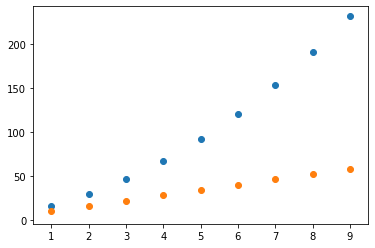

In [42]:
import matplotlib.pyplot as plt

def f(n):
    return 2 * n * n + 7 * n + 7

def g(n):
    return 6 * n + 4

X = range(1, 10)
plt.scatter(X, [f(n) for n in X])
plt.scatter(X, [g(n) for n in X])